# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import graphviz
from statistics import median ,mode ,mean

from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.metrics import roc_auc_score ,precision_score ,recall_score
import statsmodels.api as sm

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df2 = pd.read_csv('bank-full.csv')

Saving bank-full.csv to bank-full (2).csv


In [ ]:
data=df2
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [ ]:
data.shape

(45211, 17)

### Number of rows in dataframe 45211
### Number of features in dataframe 17

In [ ]:
# check data type of each attribute

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

__10 features have object type and 7 are numbers(int)__. 
 __As per the given data we know that 10 features are of category type ,so lets convert datatypes of those features__.

In [ ]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [ ]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


__After conversion of datatypes in above step.__
__10 features have category datatype and 7 have int datatype.__

# check if there are missing values



In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

__No null values are there__

In [ ]:
data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

## Five Point Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


1) Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.

2) More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile

3) Minimum balance is -8019 and maximum balance is 102127

4) Minimum age is 18 years and maximum is 95 years

# Distributions Of Numerical Columns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: Future

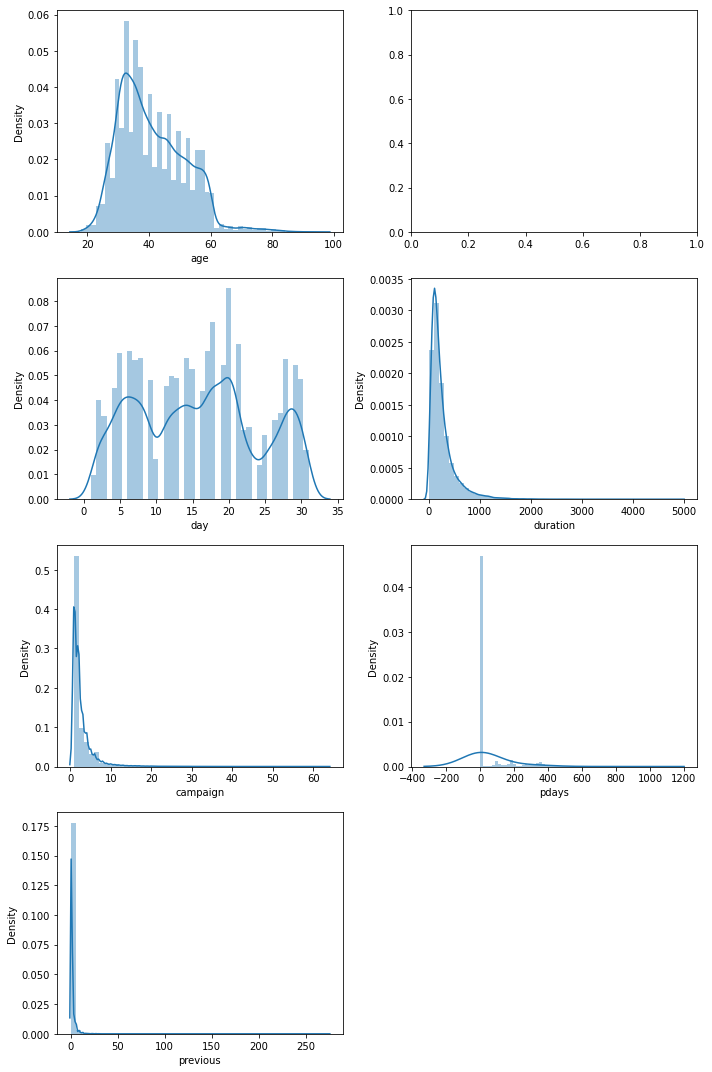

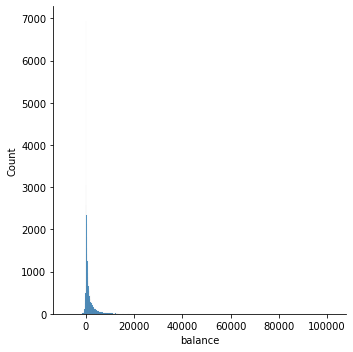

In [ ]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(data['age'],ax=axe[0]) #Distance plot of 'age'
sns.displot(data['balance'],ax=axe[1]) #Distance plot of 'balance'
sns.distplot(data['day'],ax=axe[2]) #Distance plot of 'day'
sns.distplot(data['duration'],ax=axe[3]) #Distance plot of 'duration'
sns.distplot(data['campaign'],ax=axe[4]) #Distance plot of 'campaign'
sns.distplot(data['pdays'],ax=axe[5],kde_kws={'bw':1.1}) #Distance plot of 'pdays'
sns.distplot(data['previous'],ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

from plots we conclude that
'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.

**Distribution of Categorical Feature**

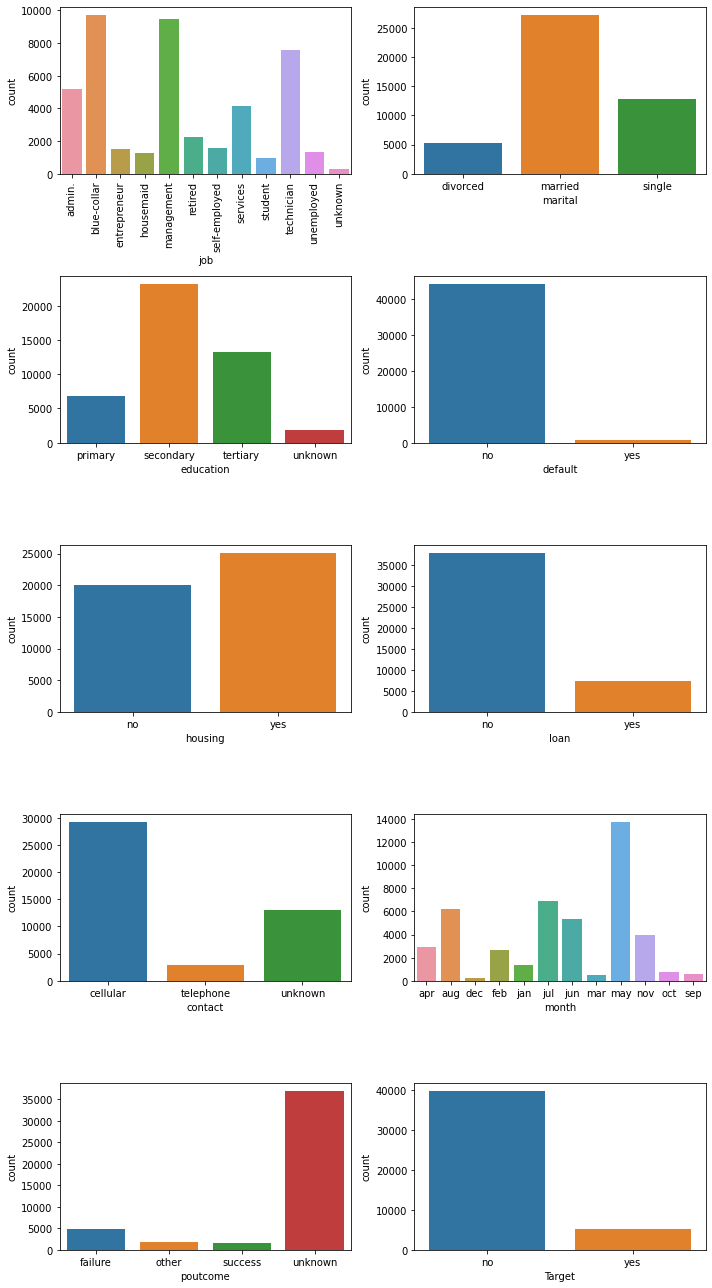

In [ ]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe=axe.flatten()
plot=sns.countplot(x=data["job"] ,data=data ,ax=axe[0])
plt.setp(plot.get_xticklabels(), rotation=90)

sns.countplot(x=data["marital"] ,data=data ,ax=axe[1])
sns.countplot(x=data["education"] ,data=data ,ax=axe[2])
sns.countplot(x=data["default"] ,data=data ,ax=axe[3])
sns.countplot(x=data["housing"] ,data=data ,ax=axe[4])
sns.countplot(x=data["loan"] ,data=data ,ax=axe[5])
sns.countplot(x=data["contact"] ,data=data ,ax=axe[6])
sns.countplot(x=data["month"] ,data=data ,ax=axe[7])
sns.countplot(x=data["poutcome"] ,data=data ,ax=axe[8])
sns.countplot(x=data["Target"] ,data=data ,ax=axe[9])

fig.tight_layout()
fig.show()

###Inferences from countplot
* More than 90% customers have no default credit
* Around 88% customers have not subscribed for term deposit (from Target graph)
* Most customers have been contacted in may
* Most customers have been contacted by cellular network(mobile phone)
* Number of customers who have housing loan is more than the number of customers who don't have housing loan
* Around 6% customers have credit in default


###Measure Of Skeweness Of Numerical Features

In [ ]:
data.skew().to_frame("Skewness measures")

,Skewness measures
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


###Checking The Pressence of Outliers

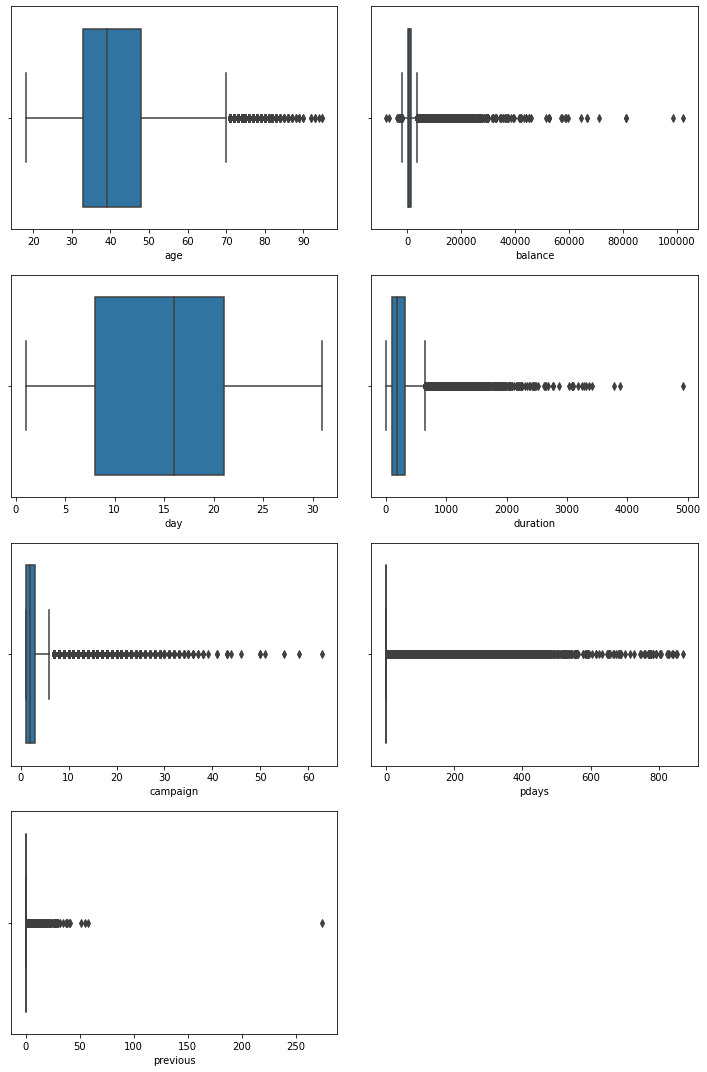

In [ ]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.boxplot(x="age" ,data=data,ax=axe[0]) #Distance plot of 'age'
sns.boxplot(x='balance',data=data,ax=axe[1]) #Distance plot of 'balance'
sns.boxplot(x='day', data=data,ax=axe[2]) #Distance plot of 'day'
sns.boxplot(x='duration', data=data,ax=axe[3]) #Distance plot of 'duration'
sns.boxplot(x='campaign', data=data,ax=axe[4]) #Distance plot of 'campaign'
sns.boxplot(x='pdays', data=data,ax=axe[5] ) #Distance plot of 'pdays'
sns.boxplot(x='previous', data=data,ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

### Inference from boxplots
* Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* Values less than 0 are present in 'Balance' column

###Distribution Of Target Column

In [ ]:
data["Target"].value_counts().to_frame("Target Feature Distribution")

,Target Feature Distribution
no,39922
yes,5289


####dataset is imbalanced.

###Data Preprocessing

In [ ]:
df=data.copy()
encoder=LabelEncoder()

df["default"]=encoder.fit_transform(df["default"]).astype(int)
df["marital"]=encoder.fit_transform(df["marital"]).astype(int)
df["loan"]=encoder.fit_transform(df["loan"]).astype(int)
df["housing"]=encoder.fit_transform(df["housing"]).astype(int)
df["Target"]=encoder.fit_transform(df["Target"]).astype(int)
df["month"]=encoder.fit_transform(df["month"]).astype(int)
df["poutcome"]=encoder.fit_transform(df["poutcome"]).astype(int)
df["education"]=encoder.fit_transform(df["education"]).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


##Checking & modifying datatypes after Label Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.3 MB


In [ ]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
#changing datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


###Handling Outliers With Mean Replacement

In [ ]:
meanbal=float(df["balance"].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75), meanbal, df['balance'])

meandur=float(df["duration"].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75), meanbal, df['duration'])

meancamp=float(df["campaign"].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75), meanbal, df['campaign'])

meandpd=float(df["pdays"].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75), meanbal, df['pdays'])

meanpr=float(df["previous"].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75), meanbal, df['previous'])



###After removing outliers

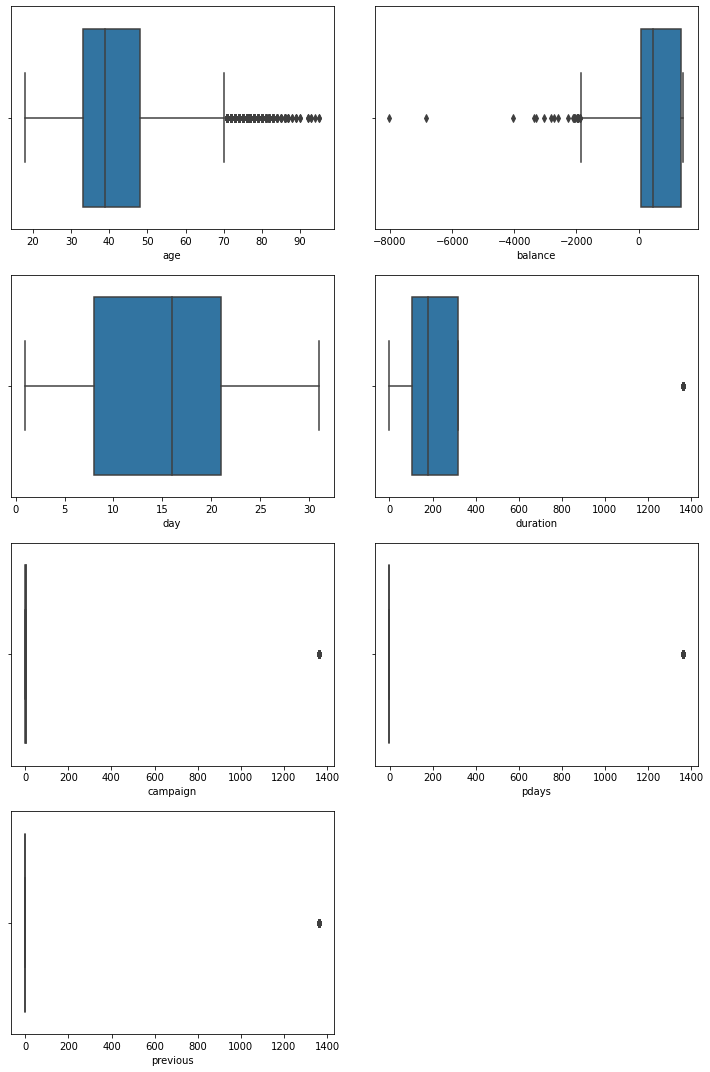

In [ ]:
fig ,axe =plt.subplots(nrows=4 ,ncols=2 ,figsize=(10,15))
axe=axe.flatten()

sns.boxplot(x="age" ,data=df,ax=axe[0]) #Distance plot of 'age'
sns.boxplot(x='balance',data=df,ax=axe[1]) #Distance plot of 'balance'
sns.boxplot(x='day', data=df,ax=axe[2]) #Distance plot of 'day'
sns.boxplot(x='duration', data=df,ax=axe[3]) #Distance plot of 'duration'
sns.boxplot(x='campaign', data=df,ax=axe[4]) #Distance plot of 'campaign'
sns.boxplot(x='pdays', data=df,ax=axe[5] ) #Distance plot of 'pdays'
sns.boxplot(x='previous', data=df,ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

Corr Plot Of All Features

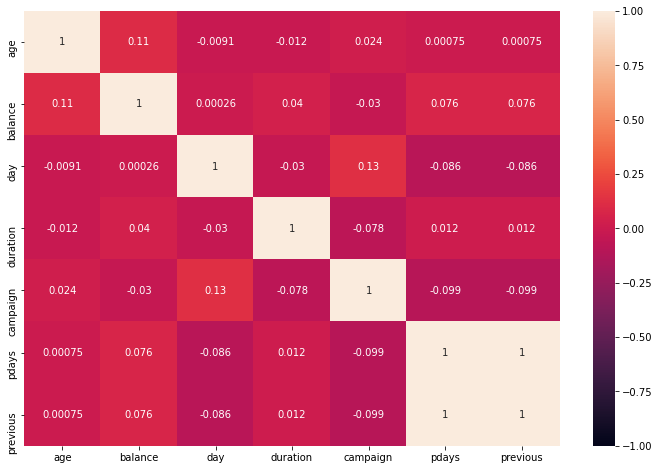

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() ,annot=True ,vmax=1 ,vmin=-1)

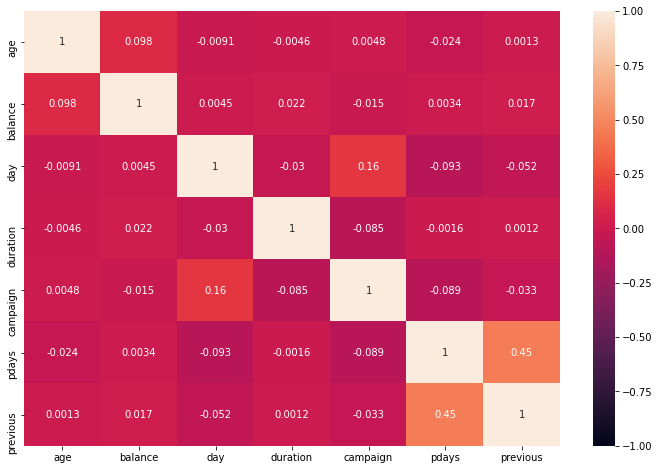

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr() ,annot=True ,vmax=1 ,vmin=-1)

## Removing columns:

* 'job','education' and 'contact' attributes contain multiple unknown values.
* As they are specific string values and not numerical so cannot be treated with median, mean replacement
* As per data description, duration attribute is removed to have a realistic prediction.
* 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
* 'pdays' and 'previous' are highly correlated so removing any one from both of them.
*  Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0
1,44,technician,2,1,0,29.000000,1,0,unknown,5,8,151.0,1.0,-1.0,0.0,3,0
2,33,entrepreneur,1,1,0,2.000000,1,1,unknown,5,8,76.0,1.0,-1.0,0.0,3,0
3,47,blue-collar,1,3,0,1362.272058,1,0,unknown,5,8,92.0,1.0,-1.0,0.0,3,0
4,33,unknown,2,3,0,1.000000,0,0,unknown,5,8,198.0,1.0,-1.0,0.0,3,0


In [ ]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df2=df.drop(['job','education','contact','duration','pdays','day','month'] ,axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


###Pairplot

In [ ]:
df2['marital']=df2['marital'].cat.as_ordered()

In [ ]:
df2['default']=df2['default'].cat.as_ordered()
df2['housing']=df2['housing'].cat.as_ordered()
df2['loan']=df2['loan'].cat.as_ordered()
df2['poutcome']=df2['poutcome'].cat.as_ordered()
df2['Target']=df2['Target'].cat.as_ordered()


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       45211 non-null  int64   
 1   marital   45211 non-null  category
 2   default   45211 non-null  category
 3   balance   45211 non-null  float64 
 4   housing   45211 non-null  category
 5   loan      45211 non-null  category
 6   campaign  45211 non-null  float64 
 7   previous  45211 non-null  float64 
 8   poutcome  45211 non-null  category
 9   Target    45211 non-null  category
dtypes: category(6), float64(3), int64(1)
memory usage: 1.6 MB


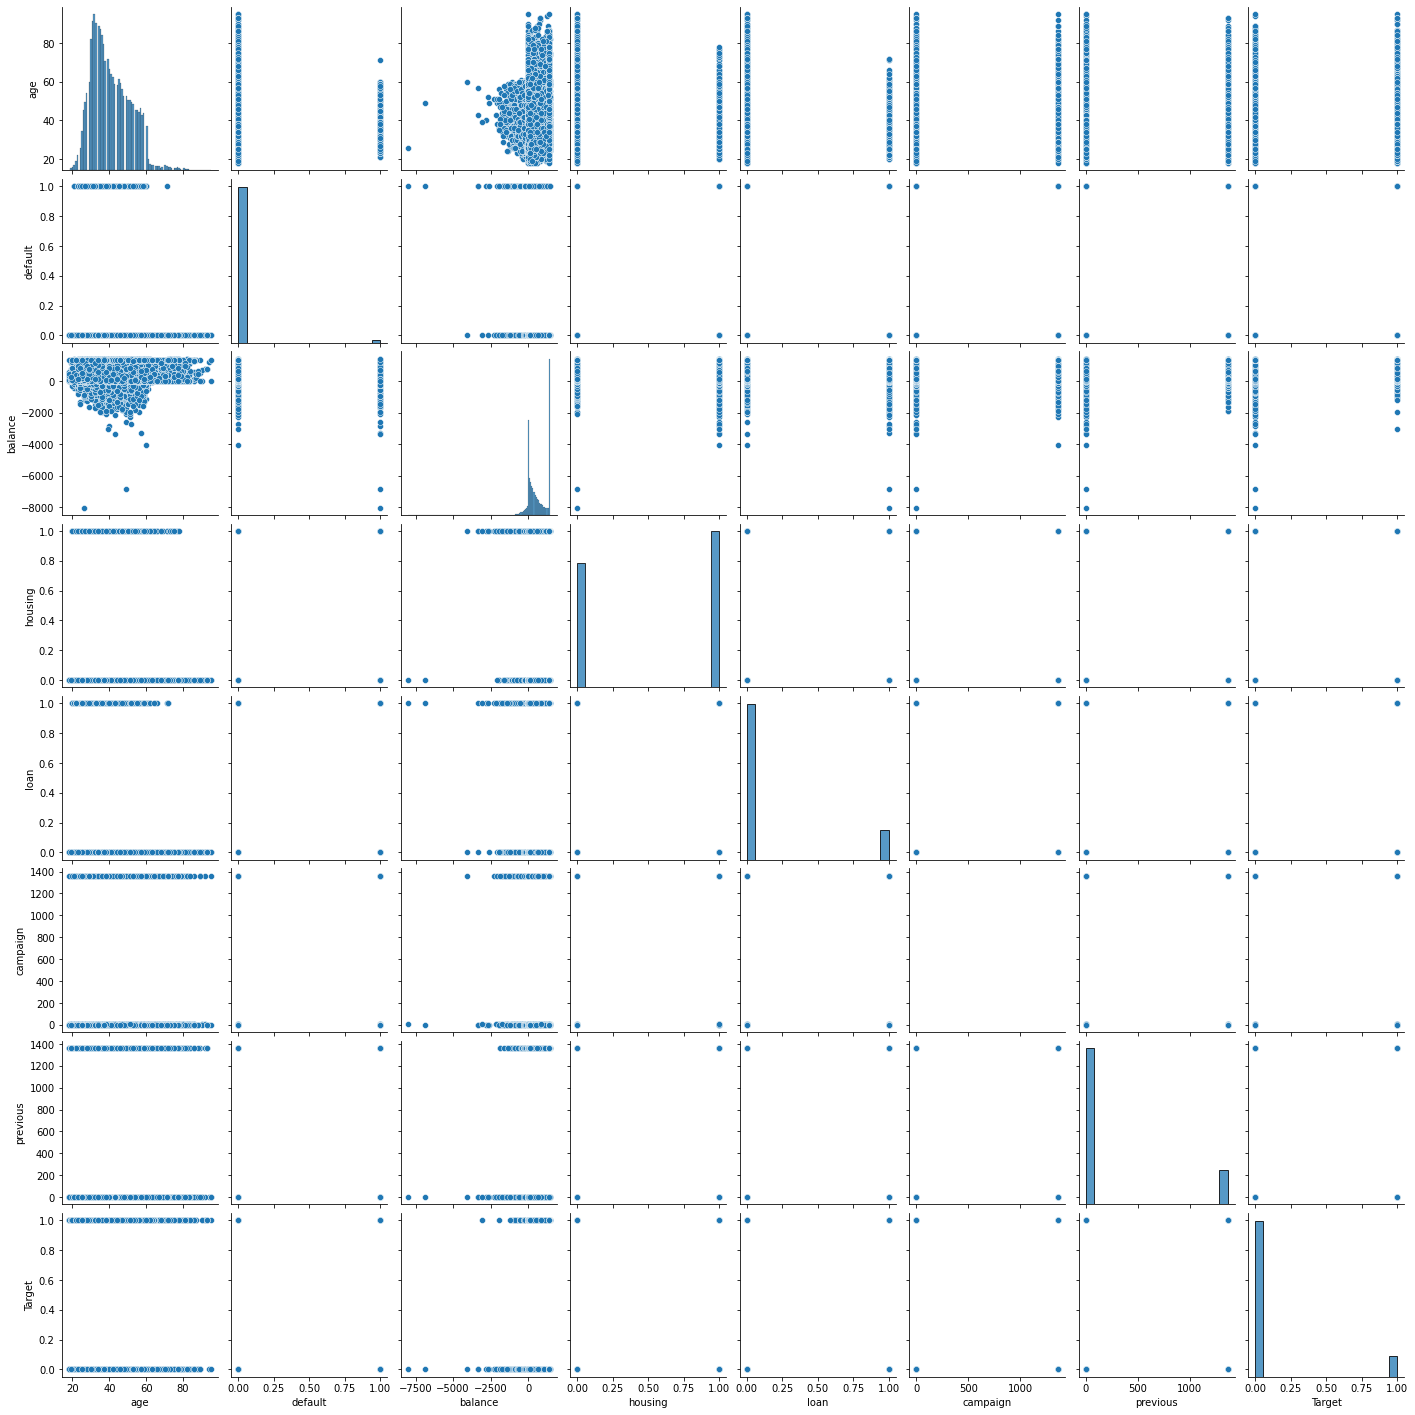

In [ ]:
sns.pairplot(df2)

## Split Data for Tarining and Testing(70:30)

In [ ]:
x=df2.drop("Target",axis=1)
y=df["Target"]

In [ ]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3 ,random_state=2)

###Scalling the data

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## Building Models

###Logistic regression

In [ ]:
logic_r=LogisticRegression(solver="liblinear")
logic_r.fit(x_train_scaled, y_train)
log_pred=logic_r.predict(x_test_scaled)
log_accuracy=accuracy_score(y_test, log_pred)
print("\nConfusion matric\n\n",confusion_matrix(y_test, log_pred))
print("\n Accuracy score",accuracy_score(y_test, log_pred)*100)

print("\n Classification report",classification_report(y_test,log_pred))


Confusion matric

 [[11897   102]
 [ 1316   249]]

 Accuracy score 89.54585667944559

 Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.16      0.26      1565

    accuracy                           0.90     13564
   macro avg       0.80      0.58      0.60     13564
weighted avg       0.88      0.90      0.86     13564



### Naive Bayes

In [ ]:
NB=GaussianNB()
NB.fit(x_train_scaled, y_train)
NB_pred=NB.predict(x_test_scaled)
NB_accuracy=accuracy_score(y_test, NB_pred)
print("\nConfusion matric\n\n",confusion_matrix(y_test, NB_pred))
print("\n Accuracy score",accuracy_score(y_test, NB_pred)*100)

print("\n Classification report",classification_report(y_test,NB_pred))



Confusion matric

 [[10627  1372]
 [ 1043   522]]

 Accuracy score 82.19551754644647

 Classification report               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



### KNN Model

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled ,y_train)
knn_pred=knn.predict(x_test_scaled)
knn_accuracy=accuracy_score(y_test, knn_pred)

print("\nConfusion matric\n\n",confusion_matrix(y_test, knn_pred))
print("\n Accuracy score",accuracy_score(y_test, knn_pred)*100)

print("\n Classification report",classification_report(y_test,knn_pred))


Confusion matric

 [[11488   511]
 [ 1231   334]]

 Accuracy score 87.15718077263345

 Classification report               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.40      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.60     13564
weighted avg       0.84      0.87      0.85     13564



### SVC model

In [ ]:
svc=SVC()
svc.fit(x_train_scaled, y_train)
svc_pred=svc.predict(x_test_scaled)
scv_accuracy=accuracy_score(y_test, svc_pred)

print("\nConfusion matric\n\n",confusion_matrix(y_test, svc_pred))
print("\n Accuracy score",accuracy_score(y_test, svc_pred)*100)

print("\n Classification report",classification_report(y_test,svc_pred))


Confusion matric

 [[11862   137]
 [ 1284   281]]

 Accuracy score 89.52373930993807

 Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.18      0.28      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



### Decision Tree

In [ ]:
dtree=DecisionTreeClassifier(criterion="gini" ,random_state=1)
dtree.fit(x_train_scaled, y_train)
dt_pred=dtree.predict(x_test_scaled)
dt_accuracy=accuracy_score(y_test, dt_pred)

print("\nConfusion matric\n\n",confusion_matrix(y_test, dt_pred))
print("\n Accuracy score",accuracy_score(y_test, dt_pred)*100)
print("\n Classification report",classification_report(y_test,dt_pred))


Confusion matric

 [[10846  1153]
 [ 1167   398]]

 Accuracy score 82.89590091418461

 Classification report               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.26      0.25      0.26      1565

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564



###Feature Importance test for decision tree

In [ ]:
xvar=df2.drop("Target",axis=1)
feature_cols=xvar.columns
feat_importance=dtree.tree_.compute_feature_importances(normalize=False)
feat_imp_dict=dict(zip(feature_cols, dtree.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict ,orient="index")
feat_imp.sort_values(by=0,ascending=False)

,0
balance,0.450690
age,0.261864
poutcome,0.091307
campaign,0.065804
marital,0.041988
previous,0.034786
loan,0.028547
housing,0.020642
default,0.004372


In [ ]:
dtreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) 
dtreeR.fit(x_train, y_train) 
predicted_DTR = dtreeR.predict(x_test) 


print('\nConfusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) 

DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:'.format(DTR_accuracy)) 

print('\n\n Classification Report\n',classification_report(y_test,predicted_DTR)) 



Confusion Matrix
 [[11837   162]
 [ 1262   303]]
Accuracy of Decision Tree with Regularization:


 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.65      0.19      0.30      1565

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



### Bagging Ensemble model

In [ ]:
bagc=BaggingClassifier(base_estimator=dtree ,n_estimators=500 ,random_state=1)
bagc.fit(x_train_scaled , y_train)
bag_pred=bagc.predict(x_test_scaled)

bagc_accuracy=accuracy_score(y_test, bag_pred)
print("\nConfusion matric\n\n",confusion_matrix(y_test, bag_pred))
print("\n Accuracy score",accuracy_score(y_test, bag_pred)*100)
print("\n Classification report",classification_report(y_test,bag_pred))



Confusion matric

 [[11545   454]
 [ 1242   323]]

 Accuracy score 87.49631377174875

 Classification report               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.87      0.86     13564



### Adaptive Boosting Ensemble

In [ ]:
 ada=AdaBoostClassifier(n_estimators=50 ,random_state=1)
 ada.fit(x_train, y_train)
 ada_pred=ada.predict(x_test)
ada_accuracy=accuracy_score(y_test, ada_pred)
print("\nConfusion matric\n\n",confusion_matrix(y_test, ada_pred))
print("\n Accuracy score",accuracy_score(y_test, ada_pred)*100)
print("\n Classification report",classification_report(y_test,ada_pred))


Confusion matric

 [[11888   111]
 [ 1323   242]]

 Accuracy score 89.42789737540548

 Classification report               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [ ]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(x_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(x_test) #Predict


print('Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix

GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :'.format(GRAD_accuracy)) #for accuracy score
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) #for classification report


Confusion Matrix
 [[11892   107]
 [ 1321   244]]
Accuracy of KNN :

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



### Random Forest Ensemble

In [ ]:
randf=RandomForestClassifier(n_estimators=100 ,random_state=2 ,max_features=3)
randf.fit(x_train, y_train)
randf_pred=randf.predict(x_test)
randf_accuracy=accuracy_score(y_test, randf_pred)

print("\nConfusion matric\n\n",confusion_matrix(y_test, randf_pred))
print("\n Accuracy score",accuracy_score(y_test, randf_pred)*100)
print("\n Classification report",classification_report(y_test,randf_pred))


Confusion matric

 [[11541   458]
 [ 1219   346]]

 Accuracy score 87.63639044529637

 Classification report               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## comparing accuracy of various models

In [ ]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', knn_accuracy),
      ('Logistic Regression', log_accuracy),
      ('SVC', scv_accuracy ),
      ('Decision Tree',dt_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',bagc_accuracy),
      ('Adaptive Boosting',ada_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',randf_accuracy)] 
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) 

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) 

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
2,Logistic Regression,0.895459
3,SVC,0.895237
5,Decision Tree with Regularization,0.895016
8,Gradient Boosting,0.894721
7,Adaptive Boosting,0.894279
9,Random Forest N=100,0.876364
6,Bagging,0.874963
1,KNN,0.871572
4,Decision Tree,0.828959
0,Naive bayes,0.821955


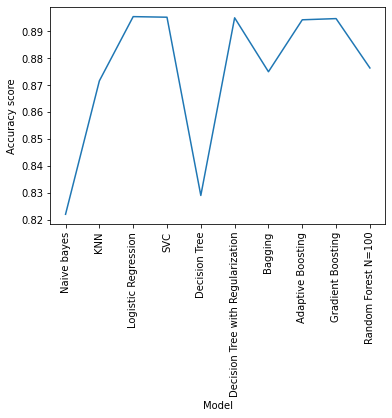

In [ ]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion:
## Comments on dataset:
* The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
* The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
* Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
* This situation could have been avoided if the datset was balanced. 
* Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

## Comments on  Models:
* When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
* SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
* After removing the 'duration' column, The highest model score dropped by 0.5%.
* The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
* In Decision Trees, Gradient boosting method always performed better for this dataset.
* While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

## Miscellaneous Comments:
* After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
* If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
* Outlier handeling did not make any significant difference in the accuracy scores of models.
* I have tried to keep minimum time complexity of this project.